In [ ]:
from pandas.errors import InvalidIndexError
#Project 4 Cluster Analysis

import numpy as np
import pandas as pd

from sklearn import cluster
from scipy import stats
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

#Reading the data
df = pd.read_csv("https://raw.githubusercontent.com/JasonTPhillipsJr/DataProcessing_P4/main/imdb_dataset.csv")

#Normalizing the data (may not be needed for now)
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

#Scrambles the data around (Also may be needed for better testing later.)
#df = df.reindex(np.random.permutation(df.index)) 
#df.reset_index(inplace = True, drop = True)

df = df.replace('?', np.NaN)
df.dropna(inplace = True)
df

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [ ]:
"""
Before we proceed with anything else, we need to convert USEFUL columns to INTs
We need columns that would help cluster a movie genre. i.e ratings, director, studios, etc.
Some will need a simple replace to convert a string to a number.
Others will need a different function to assign every unique string with a unique number.

#Replacing Strings with numbers to use in a Cluster Model.
df['mpaa_rating'] = df['mpaa_rating'].replace('NC-17', 6)
df['mpaa_rating'] = df['mpaa_rating'].replace('Unrated', 5)
df['mpaa_rating'] = df['mpaa_rating'].replace('R', 4)
df['mpaa_rating'] = df['mpaa_rating'].replace('PG-13', 3)
df['mpaa_rating'] = df['mpaa_rating'].replace('PG', 2)
df['mpaa_rating'] = df['mpaa_rating'].replace('G', 1)


#Replacing all yes/no answers with numbers.
df = df.replace('yes', 1)
df = df.replace('no', 0)

#Replace film type with numbers
df['title_type'] = df['title_type'].replace('Feature Film', 1)
df['title_type'] = df['title_type'].replace('Documentary', 2)
df['title_type'] = df['title_type'].replace('TV Movie', 3)
"""
df['audience_rating'] = df['audience_rating'].replace('Upright', 1)
df['audience_rating'] = df['audience_rating'].replace('Spilled', 0)
df['critics_rating'] = df['critics_rating'].replace('Rotten', 0)
df['critics_rating'] = df['critics_rating'].replace('Fresh', 1)
df['critics_rating'] = df['critics_rating'].replace('Certified Fresh', 2)

_,idx = np.unique(df['genre'],return_inverse=True) 
df['genre'] = idx + 1



In [ ]:
df =df[df.top200_box == 'yes']
df

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
10,11,Superman II,Feature Film,1,127.0,2,Warner Bros. Pictures,1981,6,19,...,no,yes,Richard Lester,Christopher Reeve,Gene Hackman,Margot Kidder,Ned Beatty,Jackie Cooper,http://www.imdb.com/title/tt0081573/,//www.rottentomatoes.com/m/superman_ii/
118,119,101 Dalmatians,Feature Film,1,103.0,1,Buena Vista Pictures,1996,11,29,...,no,yes,Stephen Herek,Glenn Close,Jeff Daniels,Joely Richardson,Joan Plowright,Hugh Laurie,http://www.imdb.com/title/tt0115433/,//www.rottentomatoes.com/m/1074108-101_dalmati...
139,140,The Hangover,Feature Film,2,100.0,4,Warner Bros. Pictures,2009,6,5,...,no,yes,Todd Phillips,Bradley Cooper,Ed Helms,Zach Galifianakis,Justin Bartha,Heather Graham,http://www.imdb.com/title/tt1119646/,//www.rottentomatoes.com/m/10010667-hangover/
180,181,Top Gun,Feature Film,3,110.0,2,Paramount Pictures,1986,5,16,...,no,yes,Tony Scott,Tom Cruise,Kelly McGillis,Anthony Edwards,Val Kilmer,Tom Skerritt,http://www.imdb.com/title/tt0092099/,//www.rottentomatoes.com/m/top_gun/
210,211,Mission: Impossible,Feature Film,4,110.0,3,Paramount Pictures,1996,5,22,...,no,yes,Brian DePalma,Tom Cruise,Jon Voight,Henry Czerny,Jean Reno,Ving Rhames,http://www.imdb.com/title/tt0117060/,//www.rottentomatoes.com/m/mission_impossible/
219,220,Beverly Hills Cop,Feature Film,1,105.0,4,Paramount Pictures,1984,12,1,...,no,yes,Martin Brest,Eddie Murphy,Judge Reinhold,John Ashton,Lisa Eilbacher,Lisa Eichhorn,http://www.imdb.com/title/tt0086960/,//www.rottentomatoes.com/m/beverly_hills_cop/
236,237,Cast Away,Feature Film,3,143.0,3,20th Century Fox,2000,12,22,...,yes,yes,Robert Zemeckis,Tom Hanks,Helen Hunt,Nick Searcy,Chris Noth,Lari White,http://www.imdb.com/title/tt0162222/,//www.rottentomatoes.com/m/cast_away/
289,290,Grease,Feature Film,5,110.0,2,Paramount Pictures,1978,6,1,...,no,yes,Randal Kleiser,John Travolta,Olivia Newton-John,Stockard Channing,Jeff Conaway,Didi Conn,http://www.imdb.com/title/tt0077631/,//www.rottentomatoes.com/m/grease/
298,299,Harry Potter and the Chamber of Secrets,Feature Film,6,161.0,2,Warner Bros. Pictures,2002,11,15,...,no,yes,Chris Columbus,Daniel Radcliffe,Emma Watson,Rupert Grint,Jason Isaacs,Alan Rickman,http://www.imdb.com/title/tt0295297/,//www.rottentomatoes.com/m/harry_potter_and_th...
340,341,Aladdin,Feature Film,1,90.0,1,Buena Vista Distribution Compa,1992,11,11,...,no,yes,John Musker,Robin Williams,Linda Larkin,Lea Salonga,Scott Weinger,John Freeman,http://www.imdb.com/title/tt0103639/,//www.rottentomatoes.com/m/1042582-aladdin/


In [ ]:
"""
What we are trying to do: Utilize clustering techniques
to put all the movies that share some common characteristics
in one cluster. We will use KMeans and Hierarchical analysis. 
"""
#K-means clustering

#Testing different catagories for clustering
#data = df.drop(['Unnamed: 0', 'title', 'title_type', 'genre', 'mpaa_rating', 'studio', 'critics_rating', 'audience_rating',
               # 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 
               #'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url', 'dvd_rel_year', 'dvd_rel_day', 'dvd_rel_month'], axis = 1)

#Another Category for clustering the data. Select the columns you want to use to cluster a movie genre in.
#data = pd.DataFrame(df, columns = ["imdb_rating", "audience_score", "genre"])
data = pd.DataFrame(df, columns = ['critics_score', 'critics_rating', 'audience_score', 'audience_rating'])

#Include all the encoded categories now
#data = df.drop(['Unnamed: 0', 'title', 'title_type', 'runtime', 'genre', 'studio', 'critics_rating', 'audience_rating', 'director', 'actor1', 'actor2', 
                #'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day',
                #'dvd_rel_month', 'dvd_rel_day', 'dvd_rel_year'], axis = 1)
data


,critics_score,critics_rating,audience_score,audience_rating
10,89,2,75,2
118,38,0,40,1
139,79,2,84,2
180,54,0,83,2
210,63,1,71,2
219,83,2,81,2
236,90,2,83,2
289,78,2,88,2
298,82,2,79,2
340,94,2,92,2


In [ ]:
#Split the data into two clusters.
k_means = cluster.KMeans(n_clusters = 2, max_iter = 50, random_state = 1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index = df.title, columns = ['Cluster ID'])

,Cluster ID
title,
Superman II,0
101 Dalmatians,1
The Hangover,0
Top Gun,0
Mission: Impossible,0
Beverly Hills Cop,0
Cast Away,0
Grease,0
Harry Potter and the Chamber of Secrets,0


In [ ]:
#Will use later.
#_,idx = np.unique(df['studio'],return_inverse=True) 
#df['studio'] = idx + 1
#df

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns = data.columns)

,critics_score,critics_rating,audience_score,audience_rating
0,86.090909,1.909091,80.909091,2.0
1,34.500000,0.000000,37.000000,1.0
2,58.500000,0.500000,77.000000,2.0


Text(0, 0.5, 'SSE')

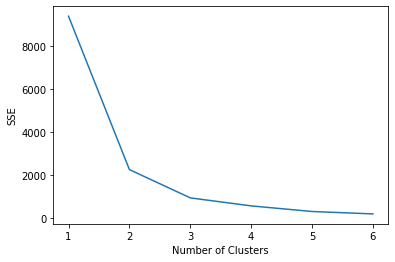

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
#!pip install --upgrade scipy

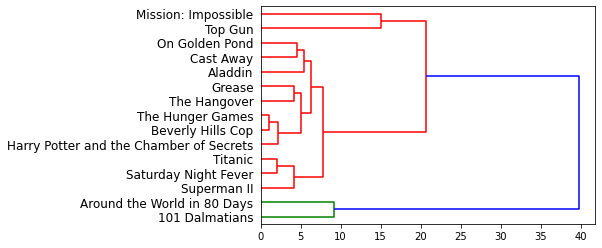

In [ ]:
#Hierachical Clustering - Single Link
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
titles = df['title']
Y = df['critics_rating']
X = data
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels = titles.tolist(),orientation = 'right')

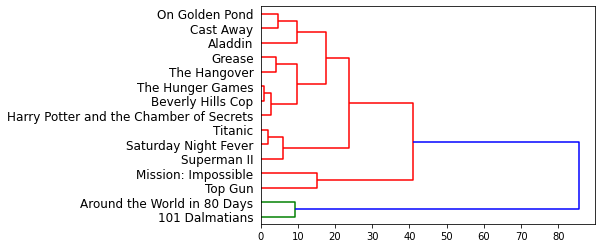

In [ ]:
#Hierachical Clustering - Complete Link
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z,labels=titles.tolist(),orientation='right')

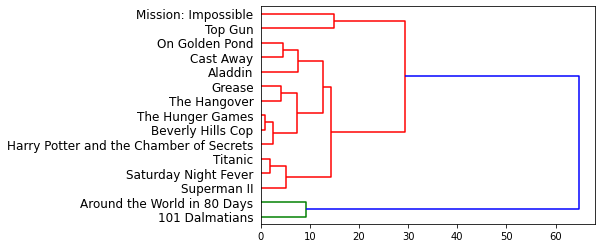

In [ ]:
#Hierachical Clustering - Average Link
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=titles.tolist(),orientation='right')